In [1]:
import numpy as np
import pandas as pd

In [2]:
purchase = pd.read_csv("D:\\2_Extra\\forage\\QVI\\QVI_purchase_behaviour.csv")

In [3]:
transaction = pd.read_excel("D:\\2_Extra\\forage\\QVI\\QVI_transaction_data.xlsx")

# Exploratory Data Analysis

In [4]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [44]:
transaction.shape

(246740, 10)

In [5]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# Transaction Data

In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Converting Excel dates to real dates.

In [8]:
from datetime import datetime, timedelta

excel_base_date = datetime(1899, 12, 30)

# Function to convert serial date to regular date
def convert_serial_to_date(serial):
    return excel_base_date + timedelta(days=serial)

transaction['DATE'] = pd.to_timedelta(transaction['DATE'], unit='D') + excel_base_date

In [9]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Product Name Column

In [10]:
transaction['PROD_NAME'].nunique()

114

In [12]:
transaction['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [13]:
transaction['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [14]:
words = transaction['PROD_NAME'].str.split(' ')
all_words = pd.DataFrame([word for sublist in words for word in sublist if word.strip() != ''], columns=['words'])
all_words

,words
0,Natural
1,Chip
2,Compny
3,SeaSalt175g
4,CCs
...,...
1359079,Tostitos
1359080,Splash
1359081,Of
1359082,Lime


In [15]:
# You can now perform various analyses, such as finding the frequency of each word
word_counts = all_words['words'].value_counts()

print(word_counts)

175g        60561
Chips       49770
150g        41633
Kettle      41288
&           35565
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Name: words, Length: 220, dtype: int64


In [16]:
clean_words = all_words[~all_words['words'].str.contains(r'^\s+$|\d|&|\W')]

# Calculate the frequency of each word
word_counts = clean_words['words'].value_counts().reset_index()
word_counts.columns = ['word', 'frequency']

# Sort the words by frequency
sorted_word_counts = word_counts.sort_values(by='frequency', ascending=False)

sorted_word_counts

,word,frequency
0,Chips,49770
1,Kettle,41288
2,Smiths,28860
3,Salt,27976
4,Cheese,27890
...,...,...
163,Whlegrn,1432
164,Pc,1431
165,NCC,1419
166,Garden,1419


In [17]:
# removing rows where product is salsa related 
transaction['SALSA'] = transaction['PROD_NAME'].str.lower().str.contains('salsa')
transaction = transaction[transaction['SALSA'] == False]
transaction.drop('SALSA', axis=1, inplace=True)

In [18]:
transaction['PROD_NAME'].describe()

count                                     246742
unique                                       105
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

Overall Summary

In [19]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Outlier in Product Quantity purchased

In [20]:
transaction[transaction['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [21]:
transaction[transaction['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

In [22]:
transaction = transaction[transaction['LYLTY_CARD_NBR'] != 226000]
purchase = purchase[purchase['LYLTY_CARD_NBR'] != 226000]

In [23]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


Transactions by date

In [24]:
transactions_by_date = transaction['DATE'].value_counts().reset_index()
transactions_by_date.columns = ['DATE', 'TRANSACTION_COUNT']

transactions_by_date.sort_values('DATE', inplace=True)

In [25]:
transactions_by_date

,DATE,TRANSACTION_COUNT
247,2018-07-01,663
304,2018-07-02,650
182,2018-07-03,674
214,2018-07-04,669
267,2018-07-05,660
...,...,...
279,2019-06-26,657
217,2019-06-27,669
186,2019-06-28,673
56,2019-06-29,703


In [26]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')
date_range_df = pd.DataFrame(date_range, columns=['DATE'])

merged_data = date_range_df.merge(transactions_by_date, on='DATE', how='left')

# Fill in zeros for days with no transactions
merged_data['TRANSACTION_COUNT'].fillna(0, inplace=True)


In [27]:
merged_data.shape

(365, 2)

In [28]:
merged_data.head()

,DATE,TRANSACTION_COUNT
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0


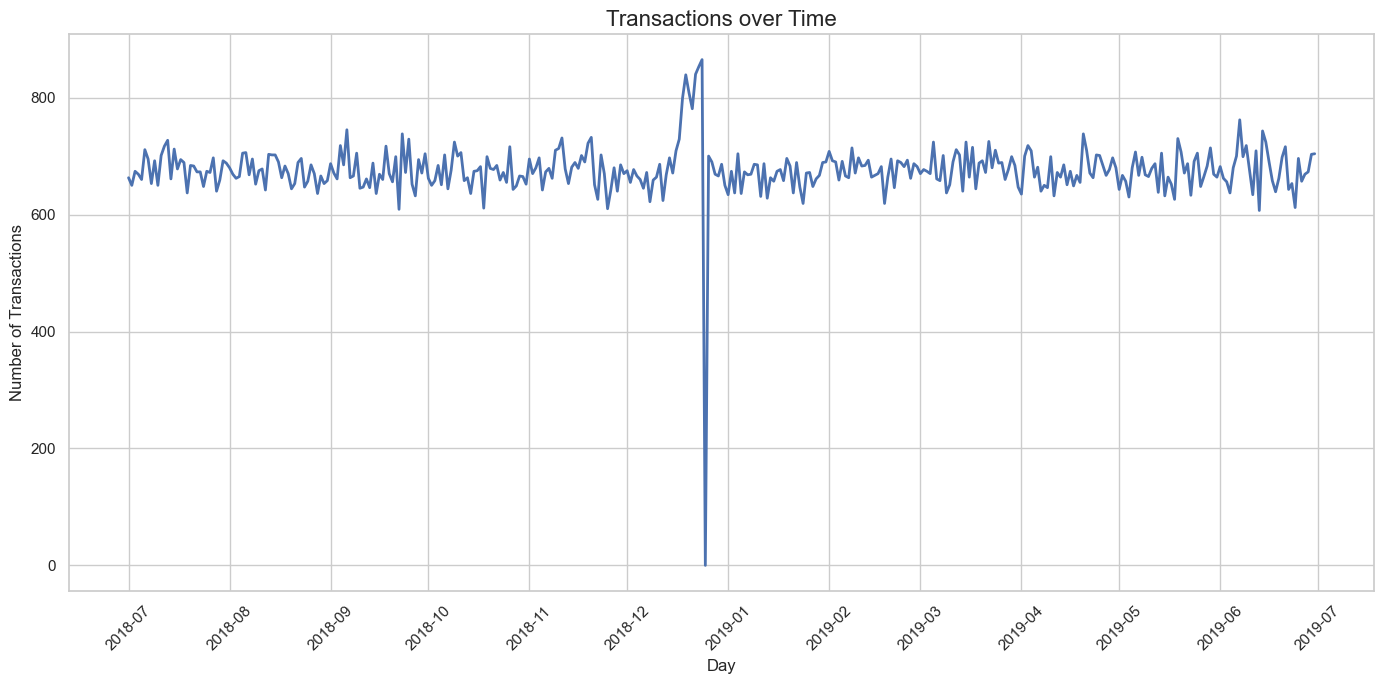

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plot the line graph
plt.plot(merged_data['DATE'], merged_data['TRANSACTION_COUNT'], linewidth=2)


plt.title('Transactions over Time', fontsize=16, ha='center')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)


plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

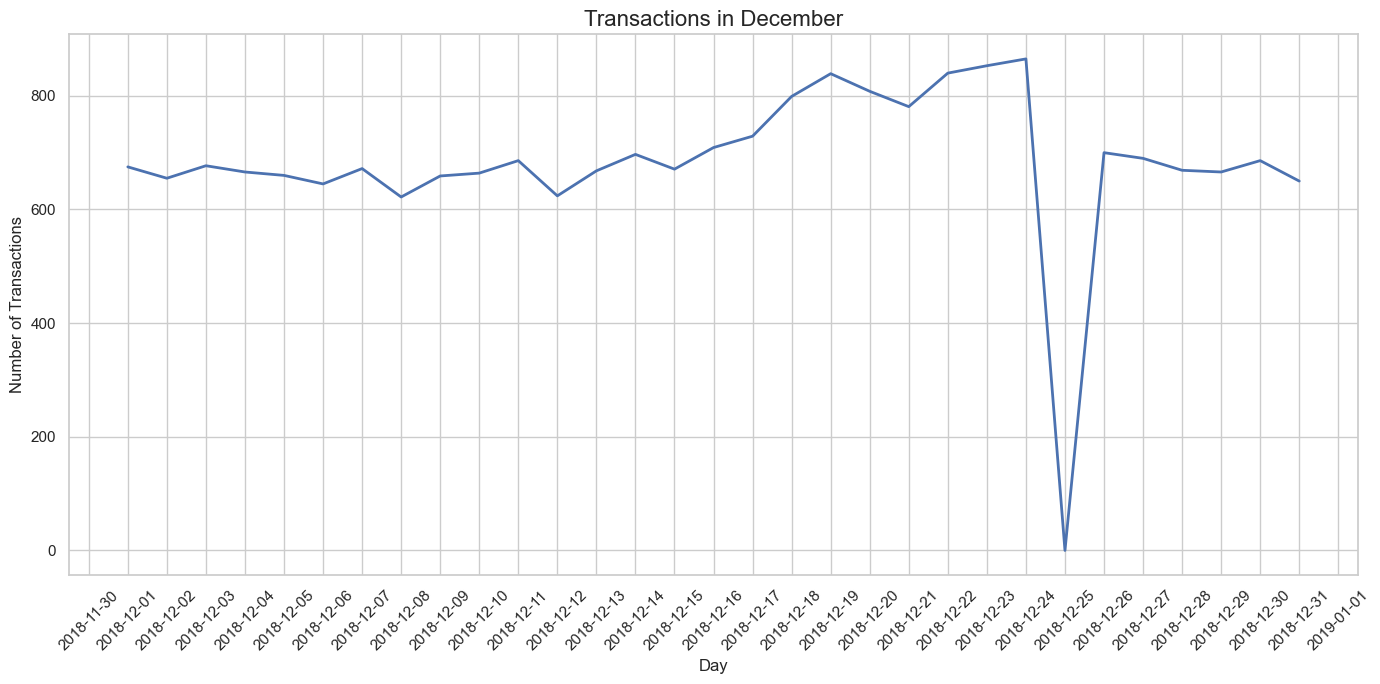

In [30]:
# Zoom in on December 
december_data = merged_data[(merged_data['DATE'].dt.month == 12) & (merged_data['DATE'].dt.year == 2018)]

plt.figure(figsize=(14, 7))
plt.plot(december_data['DATE'], december_data['TRANSACTION_COUNT'], linewidth=2)
plt.title('Transactions in December', fontsize=16, ha='center')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

Feature Engineering

In [31]:
transaction['PACK_SIZE'] = transaction['PROD_NAME'].str.extract(r'(\d+)').astype(int)

pack_size_counts = transaction['PACK_SIZE'].value_counts().reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'COUNT']

pack_size_counts.sort_values('PACK_SIZE', inplace=True)

print(pack_size_counts)

    PACK_SIZE  COUNT
17         70   1507
13         90   3008
3         110  22387
19        125   1454
2         134  25102
11        135   3257
1         150  40203
15        160   2970
5         165  15297
4         170  19983
0         175  66390
18        180   1468
14        190   2995
10        200   4473
9         210   6272
16        220   1564
12        250   3169
8         270   6285
6         330  12540
7         380   6416


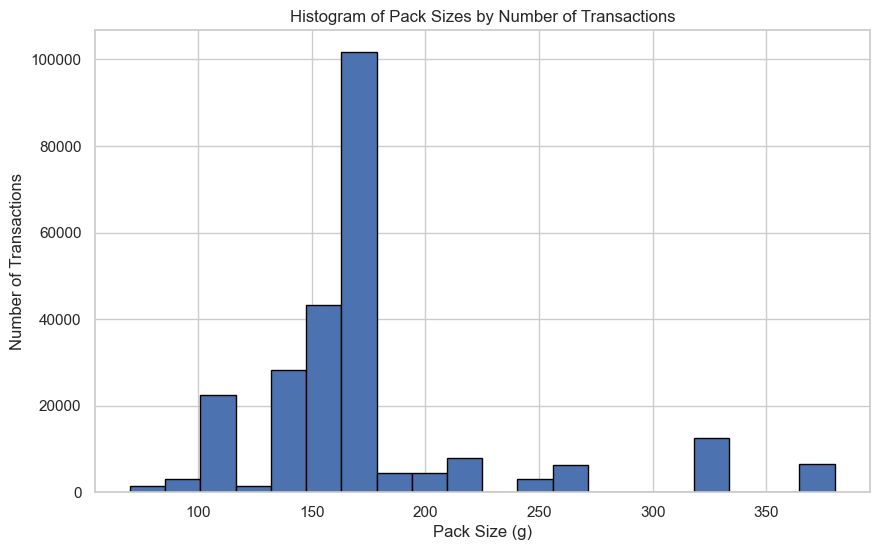

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(transaction['PACK_SIZE'], bins=transaction['PACK_SIZE'].nunique(), edgecolor='black')
plt.title('Histogram of Pack Sizes by Number of Transactions')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.show()

In [33]:
transaction['BRAND'] = transaction['PROD_NAME'].str.split(' ').str[0]
transaction['BRAND'].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [34]:
# Clean brand names
transaction['BRAND'] = transaction['BRAND'].replace({
    'Smith': 'Smiths',
    'RED': 'Red Rock Deli',
    'RRD': 'Red Rock Deli',
    'Dorito': 'Doritos',
    'Infzns': 'Infuzions',
    'Snbts': 'Sunbites',
    'GrnWves': 'Grain Waves',
    'WW': 'Woolworths' 
})


print(transaction['BRAND'].value_counts())

Kettle           41288
Smiths           30353
Doritos          25224
Pringles         25102
Infuzions        14201
Thins            14075
Red Rock Deli    11894
Woolworths       11836
Cobs              9693
Tostitos          9471
Twisties          9454
Tyrrells          6442
Grain             6272
Natural           6050
Cheezels          4603
CCs               4551
Red               4427
Sunbites          3008
Cheetos           2927
Burger            1564
Grain Waves       1468
NCC               1419
French            1418
Name: BRAND, dtype: int64


# Purchase Dataset

In [35]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72636 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72636 non-null  int64 
 1   LIFESTAGE         72636 non-null  object
 2   PREMIUM_CUSTOMER  72636 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [36]:
purchase.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [38]:
purchase['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER, dtype: int64

In [39]:
purchase['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

# Merging The Two Dataframes

In [41]:
data = pd.merge(transaction, purchase, how='left', on='LYLTY_CARD_NBR')

In [42]:
data.shape

(246740, 12)

In [46]:
data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [47]:
data.to_csv('merged_data.csv', index=False)

#  Data analysis on customer segments 

## Total Sales By LIFESTAGE and PREMIUM CUSTOMER

In [50]:
total_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

total_sales_pivot = total_sales.pivot("LIFESTAGE", "PREMIUM_CUSTOMER", "TOT_SALES")

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_19748\3970522290.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  total_sales_pivot = total_sales.pivot("LIFESTAGE", "PREMIUM_CUSTOMER", "TOT_SALES")


In [52]:
total_sales_pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,75242.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


C:\Users\ARYAN\AppData\Local\Temp\ipykernel_19748\3604082023.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TOT_SALES', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=total_sales, ci=None)


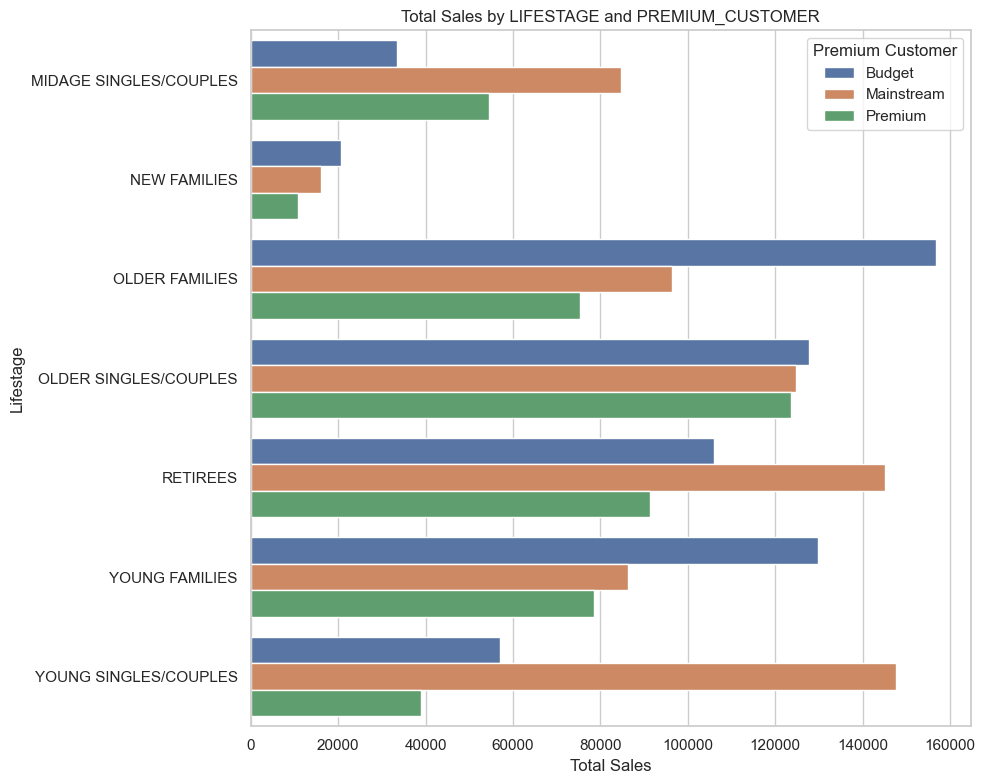

In [54]:
plt.figure(figsize=(10, 8))
sns.barplot(x='TOT_SALES', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=total_sales, ci=None)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Total Sales')
plt.ylabel('Lifestage')
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees


## Number Of Customers By LIFESTAGE AND PREMIUM CUSTOMER

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_19748\2112489924.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  num_customers_pivot = num_customers.pivot("LIFESTAGE", "PREMIUM_CUSTOMER", "LYLTY_CARD_NBR")
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_19748\2112489924.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LYLTY_CARD_NBR', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=num_customers, ci=None)


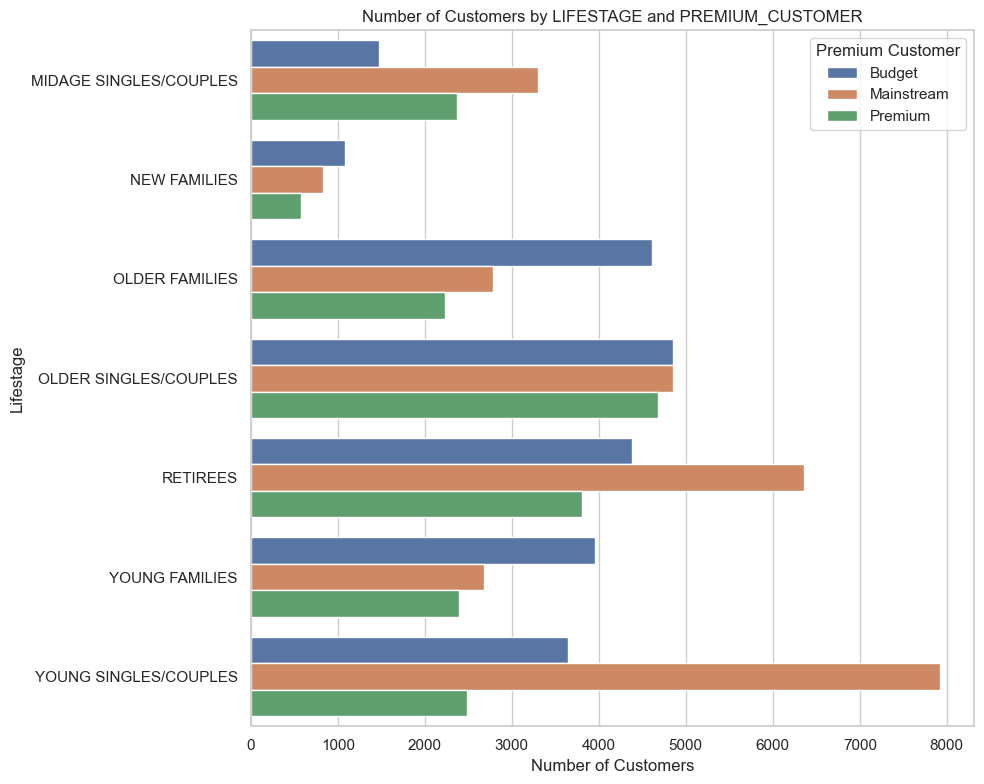

In [56]:
num_customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

num_customers_pivot = num_customers.pivot("LIFESTAGE", "PREMIUM_CUSTOMER", "LYLTY_CARD_NBR")

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='LYLTY_CARD_NBR', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=num_customers, ci=None)
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Number of Customers')
plt.ylabel('Lifestage')
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.

##  Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [58]:
units_per_customer = data.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
avg_units = units_per_customer.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

avg_units_pivot = avg_units.pivot('LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_QTY')

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_19748\766175867.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_units_pivot = avg_units.pivot('LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_QTY')


C:\Users\ARYAN\AppData\Local\Temp\ipykernel_19748\3380052180.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PROD_QTY', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_units, ci=None)


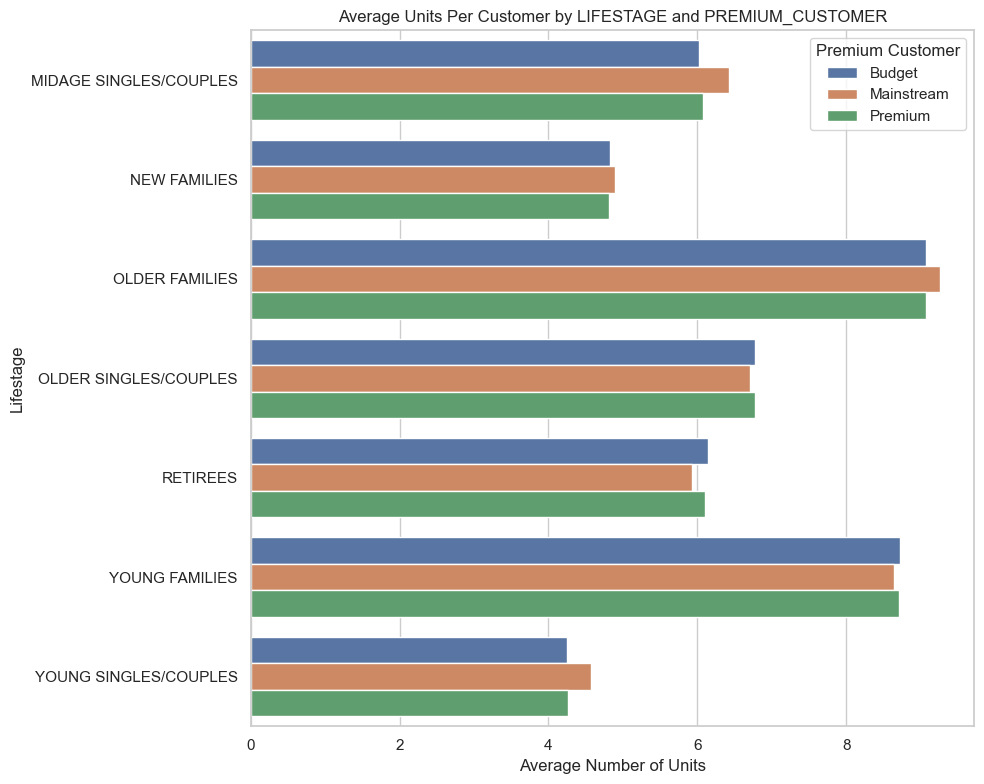

In [60]:
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='PROD_QTY', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_units, ci=None)
plt.title('Average Units Per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Average Number of Units')
plt.ylabel('Lifestage')
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

Older families and young families in general buy more chips per customer

## Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

In [61]:
data['PRICE_PER_UNIT'] = data['TOT_SALES'] / data['PROD_QTY']

avg_price_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().reset_index()
avg_price_per_unit_pivot = avg_price_per_unit.pivot('LIFESTAGE', 'PREMIUM_CUSTOMER', 'PRICE_PER_UNIT')

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_19748\1109075479.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_price_per_unit_pivot = avg_price_per_unit.pivot('LIFESTAGE', 'PREMIUM_CUSTOMER', 'PRICE_PER_UNIT')


C:\Users\ARYAN\AppData\Local\Temp\ipykernel_19748\1837837037.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PRICE_PER_UNIT', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_price_per_unit, ci=None)


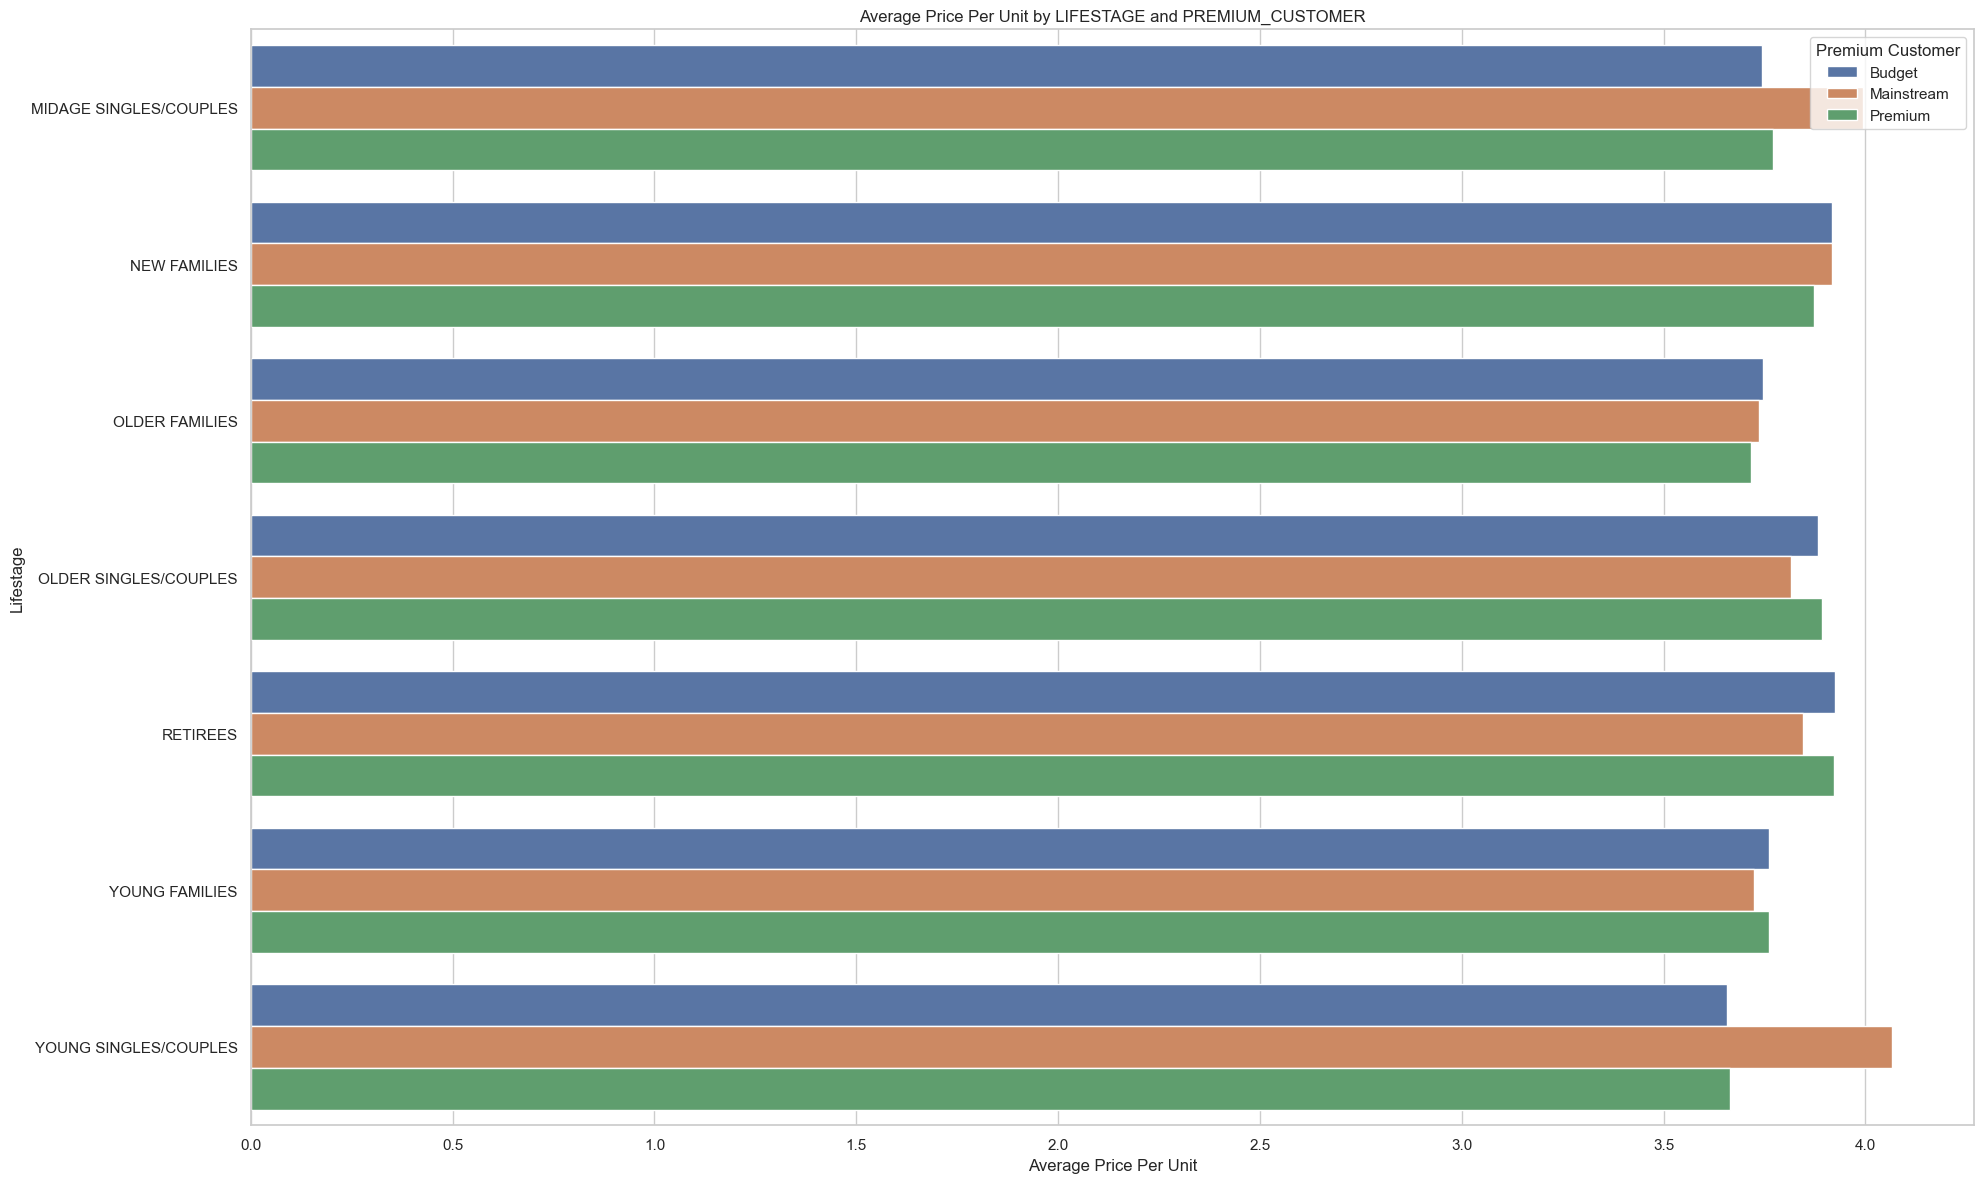

In [64]:
# Plotting
plt.figure(figsize=(20, 12))
sns.barplot(x='PRICE_PER_UNIT', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_price_per_unit, ci=None)
plt.title('Average Price Per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Average Price Per Unit')
plt.ylabel('Lifestage')
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

We Can perform t-tests for this

In [70]:
from scipy import stats

midage_mainstream = data[(data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]['PRICE_PER_UNIT']
midage_premium = data[(data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Premium')]['PRICE_PER_UNIT']
midage_budget = data[(data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Budget')]['PRICE_PER_UNIT']

# Perform t-test between Mainstream vs Premium and Budget for Midage Singles/Couples
t_stat1, p_val_mainstream_premium_midage = stats.ttest_ind(midage_mainstream, midage_premium, equal_var=False)
t_stat2, p_val_mainstream_budget_midage = stats.ttest_ind(midage_mainstream, midage_budget, equal_var=False)

In [71]:
print(f"Midage Mainstream vs Premium p-value: {p_val_mainstream_premium_midage}")
print(f"Midage Mainstream vs Budget p-value: {p_val_mainstream_budget_midage}")

Midage Mainstream vs Premium p-value: 1.2705045169661103e-44
Midage Mainstream vs Budget p-value: 7.064596224398621e-41


In [72]:
young_mainstream = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]['PRICE_PER_UNIT']
young_premium = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Premium')]['PRICE_PER_UNIT']
young_budget = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Budget')]['PRICE_PER_UNIT']

# Perform t-test between Mainstream vs Premium and Budget for Young Singles/Couples
t_stat3, p_val_mainstream_premium_young = stats.ttest_ind(young_mainstream, young_premium, equal_var=False)
t_stat4, p_val_mainstream_budget_young = stats.ttest_ind(young_mainstream, young_budget, equal_var=False)

In [73]:
print(f"Young Mainstream vs Premium p-value: {p_val_mainstream_premium_young}")
print(f"Young Mainstream vs Budget p-value: {p_val_mainstream_budget_young}")

Young Mainstream vs Premium p-value: 4.0639607781958196e-131
Young Mainstream vs Budget p-value: 2.795698078070072e-186


The extremely small p-values you obtained suggest that the differences in average price per unit between the Mainstream group and both the Premium and Budget groups for Young Singles/Couples are statistically significant.

This could mean that there is a true difference in the spending habits on chips between the Mainstream Young Singles/Couples and those in the Premium and Budget categories.

## Deeper Insights Into Mainstream - young singles/couples

Brand Preference

In [76]:
mainstream_young = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

# Total sales by brand for Mainstream young singles/couples
brand_sales_mainstream_young = mainstream_young.groupby('BRAND')['TOT_SALES'].sum()
# Total sales by brand for all segments
brand_sales_total = data.groupby('BRAND')['TOT_SALES'].sum()

# proportion of total sales for each brand within the segment
brand_proportion_mainstream_young = brand_sales_mainstream_young / brand_sales_mainstream_young.sum()
brand_proportion_total = brand_sales_total / brand_sales_total.sum()

# Compare the proportions to find preferred brands
brand_preference = (brand_proportion_mainstream_young / brand_proportion_total).sort_values(ascending=False)

In [85]:
brand_preference

BRAND
Tyrrells         1.136928
Twisties         1.131281
Doritos          1.130910
Kettle           1.110317
Tostitos         1.109579
Pringles         1.102035
Infuzions        1.080489
Grain            1.079145
Cobs             1.065027
Cheezels         1.013951
Thins            0.993526
Smiths           0.841283
French           0.661797
Cheetos          0.651120
Red Rock Deli    0.632162
Red              0.622518
Natural          0.618865
NCC              0.602006
CCs              0.575424
Grain Waves      0.575296
Sunbites         0.494253
Woolworths       0.478374
Burger           0.436551
Name: TOT_SALES, dtype: float64

In [86]:
top_5_brands = brand_preference.head(5).index.tolist()
print("Top 5 Brands prefered by Mainstream - young singles/couples are: ",top_5_brands)


Top 5 Brands prefered by Mainstream - young singles/couples are:  ['Tyrrells', 'Twisties', 'Doritos', 'Kettle', 'Tostitos']


Average Pack size bough by Mainstream-young compared to others.

In [87]:
mainstream_young_pack_size = data.loc[
    (data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
    (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'), 'PACK_SIZE'].mean()

# Calculate the average pack size for all other segments
other_segments_pack_size = data.loc[
    ~((data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
    (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')), 'PACK_SIZE'].mean()

# Compare the two averages
average_pack_sizes = pd.Series({
    'Mainstream Young': mainstream_young_pack_size,
    'Other Segments': other_segments_pack_size
})

In [88]:
average_pack_sizes

Mainstream Young    178.344249
Other Segments      175.346036
dtype: float64

There is not much difference in the avreage pack size bought.